In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
fruits = pd.read_table('fruit_data_with_colors.txt')
fruits.head()


,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [2]:
print(fruits.shape)


(59, 7)


In [3]:
print(fruits['fruit_name'].unique())


['apple' 'mandarin' 'orange' 'lemon']


In [4]:
print(fruits.groupby('fruit_name').size())


fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64


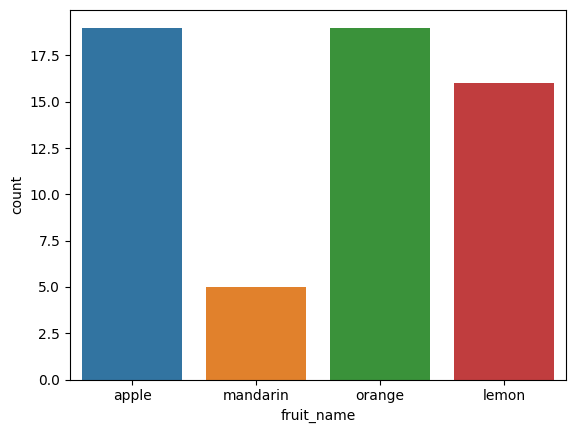

In [8]:
import seaborn as sns
sns.countplot(data=fruits, x='fruit_name', label="Count")
plt.show()


In [ ]:
sns.

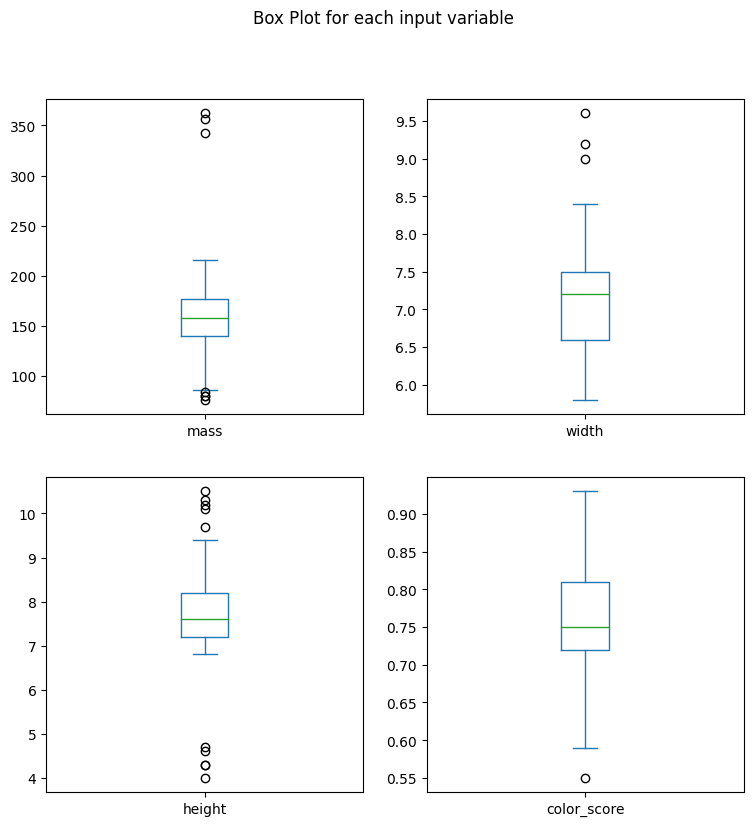

In [9]:
fruits.drop('fruit_label', axis=1).plot(kind='box', subplots=True, layout=(2, 2), sharex=False, sharey=False, figsize=(9, 9),
                                        title='Box Plot for each input variable')
plt.savefig('fruits_box')
plt.show()


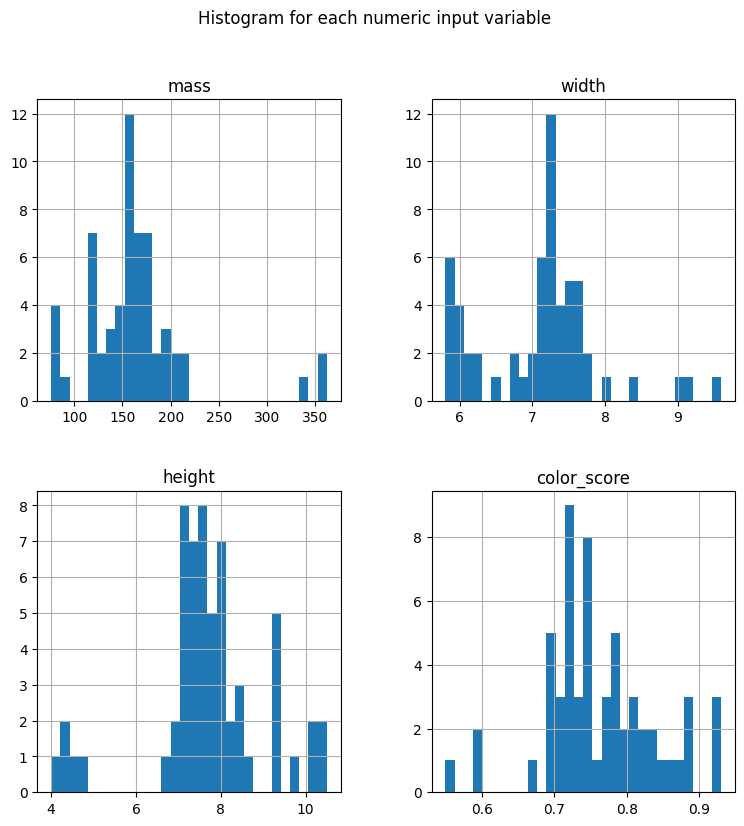

In [10]:
import pylab as pl
fruits.drop('fruit_label', axis=1).hist(bins=30, figsize=(9, 9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('fruits_hist')
plt.show()


C:\Users\susan\AppData\Local\Temp\ipykernel_7476\2488949733.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('gnuplot')


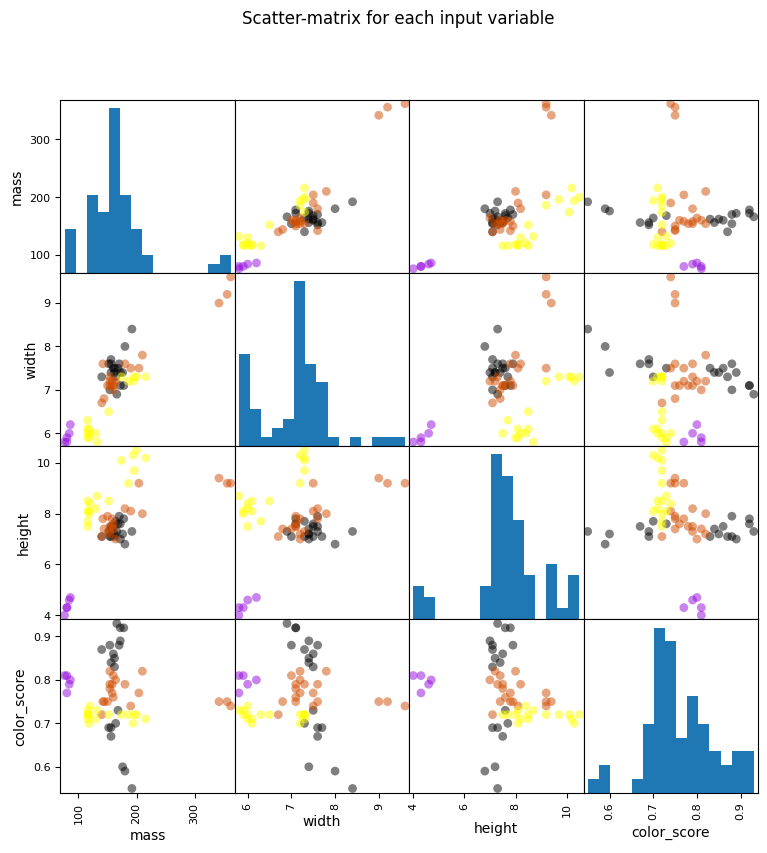

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

feature_names = ['mass', 'width', 'height', 'color_score']
X = fruits[feature_names]
y = fruits['fruit_label']
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X, c=y, marker='o', s=40, hist_kwds={
                                     'bins': 15}, figsize=(9, 9), cmap=cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('fruits_scatter_matrix.png')


In [14]:
# Create Training and Test Sets and Apply Scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [15]:
# Build Models
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
      .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
      .format(logreg.score(X_test, y_test)))


Accuracy of Logistic regression classifier on training set: 0.75
Accuracy of Logistic regression classifier on test set: 0.47


In [34]:
# Import libraries
from sklearn.linear_model import LogisticRegression
# Create an instance of LogisticRegression
logreg = LogisticRegression()
# Fit the model to the training data
logreg.fit(X_train, y_train)
# Print accuracy on the training set
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
      .format(logreg.score(X_train, y_train)))
# Print accuracy on the test set
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
      .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.82
Accuracy of Logistic regression classifier on test set: 0.47


c:\Users\susan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [71]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
      .format(clf.score(X_test, y_test)))


Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.83


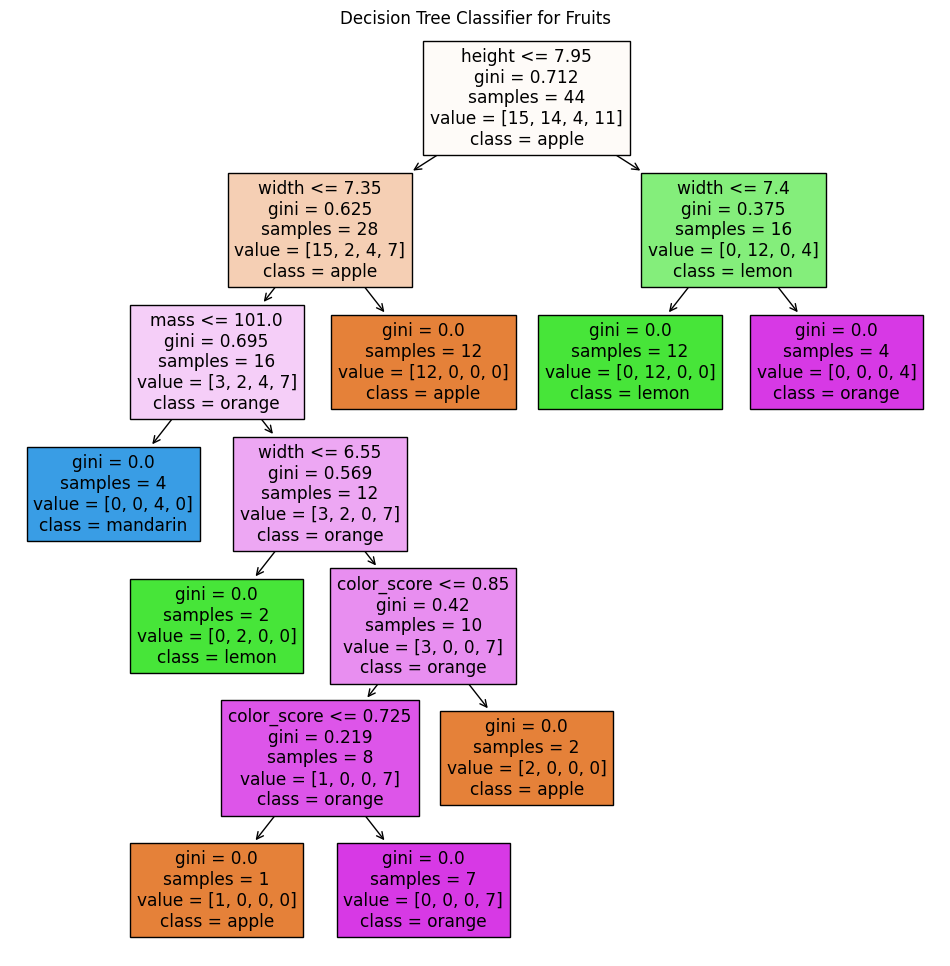

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
import pandas as pd

# Load and preprocess the dataset
fruits = pd.read_table('fruit_data_with_colors.txt')
X = fruits[['mass', 'width', 'height', 'color_score']].values
y = fruits['fruit_name'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Encode the labels to numeric values
le = preprocessing.LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

# Create and train the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train_encoded)

# Plot the decision tree
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(clf, ax=ax, feature_names=['mass', 'width', 'height', 'color_score'],
              class_names=le.inverse_transform(clf.classes_), filled=True)
plt.title('Decision Tree Classifier for Fruits')
plt.show()


In [54]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
      .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
      .format(knn.score(X_test, y_test)))


Accuracy of K-NN classifier on training set: 0.80
Accuracy of K-NN classifier on test set: 0.53


In [55]:

#Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.86
Accuracy of LDA classifier on test set: 0.67


In [56]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.86
Accuracy of GNB classifier on test set: 0.67


In [57]:
# Support Vector Machine
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
      .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
      .format(svm.score(X_test, y_test)))


Accuracy of SVM classifier on training set: 0.59
Accuracy of SVM classifier on test set: 0.27


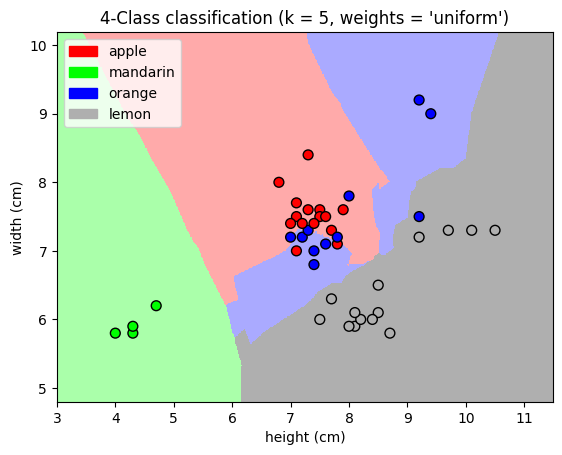

In [58]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches
from sklearn import neighbors
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = X[['height', 'width']].to_numpy()
    y_mat = y.to_numpy()
    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#AFAFAF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#AFAFAF'])

    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)

    # Plot the decision boundary by assigning a color in the color map to each mesh point.
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50

    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size,
                c=y, cmap=cmap_bold, edgecolor='black')
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])
    plt.xlabel('height (cm)')
    plt.ylabel('width (cm)')
    plt.title("4-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights))
    plt.show()

plot_fruit_knn(X_train, y_train, 5, 'uniform')



([<matplotlib.axis.XTick at 0x203594a78d0>,
 [Text(0, 0, '0'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20')])

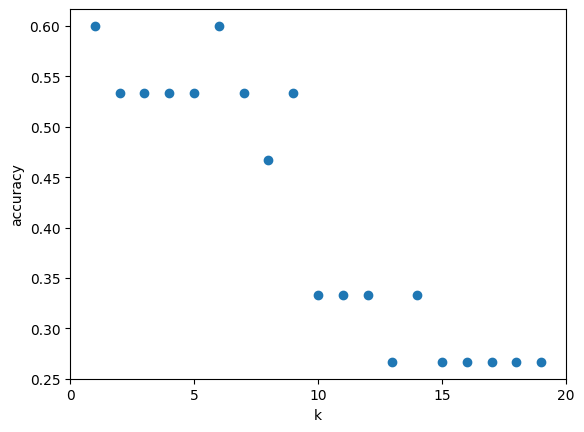

In [59]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

In [60]:
# Import libraries
from sklearn.decomposition import PCA

# Create an instance of PCA with desired number of components
pca = PCA(n_components=2) # You can adjust the number of components as per your requirement

# Apply PCA on the feature data
X_pca = pca.fit_transform(X)

# Get the transformed feature data after PCA
X_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Fit the model to the transformed feature data
logreg.fit(X_pca, y)

# Print accuracy on the training set
print('Accuracy of Logistic regression classifier on training set (after PCA): {:.2f}'
      .format(logreg.score(X_pca, y)))


Accuracy of Logistic regression classifier on training set (after PCA): 0.80


c:\Users\susan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
# Import libraries
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# Create an instance of PCA with desired number of components
pca = PCA(n_components=4) # You can adjust the number of components as per your requirement
svm = SVC(C=1.0, kernel='rbf')

# Apply PCA on the feature data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an instance of SVM
svm = SVC()

# Fit the SVM model to the transformed training set after PCA
svm.fit(X_train_pca, y_train)

# Print accuracy on the training set after PCA
print('Accuracy of SVM classifier on training set (after PCA): {:.2f}'
      .format(svm.score(X_train_pca, y_train)))

# Print accuracy on the test set after PCA
print('Accuracy of SVM classifier on test set (after PCA): {:.2f}'
      .format(svm.score(X_test_pca, y_test)))


Accuracy of SVM classifier on training set (after PCA): 0.70
Accuracy of SVM classifier on test set (after PCA): 0.40


In [69]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the fruit dataset
fruits = pd.read_table('fruit_data_with_colors.txt')

# Extract features and target variable
X = fruits[['mass', 'width', 'height', 'color_score']]  # Update with your feature columns
y = fruits['fruit_label']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
clf = RandomForestClassifier()

# Train the classifier on the training set
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(accuracy))


Accuracy of Random Forest classifier on test set: 0.92
